## Library And Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wine_data = pd.read_csv('wine.csv')
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Basic EDA

In [3]:
print('Dimenssion of data :', wine_data.shape,'\n')
wine_data.info()

Dimenssion of data : (178, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Type               178 non-null int64
Alcohol            178 non-null float64
Malic              178 non-null float64
Ash                178 non-null float64
Alcalinity         178 non-null float64
Magnesium          178 non-null int64
Phenols            178 non-null float64
Flavanoids         178 non-null float64
Nonflavanoids      178 non-null float64
Proanthocyanins    178 non-null float64
Color              178 non-null float64
Hue                178 non-null float64
Dilution           178 non-null float64
Proline            178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


- No categorical feature is found
- All the features are of numeric 

In [4]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [5]:
wine_data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

- Null count = 0 

In [6]:
wine_data['Type'].unique()

array([1, 2, 3], dtype=int64)

- Wine type has 3 unique values as 1, 2, 3

In [7]:
# classify predictor attributes (X) and target attribute (y)
X = wine_data.drop('Type', 1) 
y = wine_data['Type']

- X = Predictors or input variables for wine data
- y = Target or output variable

## Normalize Data

In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [9]:
# Perform transformation:
X = sc.fit_transform(X)
X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## PCA 

In [10]:
from sklearn.decomposition import PCA

In [11]:
# 14 is the number of features that we have selected
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(X)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

- n_components = 13 (13 is the number of features that we have selected) 

In [12]:
# The amount of variance that each PCA explains is
explained_variance = pca.explained_variance_ratio_
explained_variance 

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [13]:
# Cumulative variance 
variance1 = np.cumsum(np.round(explained_variance, decimals = 4) * 100)
variance1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

## Coefficient Matrix 

In [14]:
# PCA coefficients
xo = pd.DataFrame(pca.components_)
xo
#pca.components_[0]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
3,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
4,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
5,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
6,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
7,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
8,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
9,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


- The above is the coefficient matrix where as the first row is the coefficients that generated the first PC.
- Each of the components are reduced 

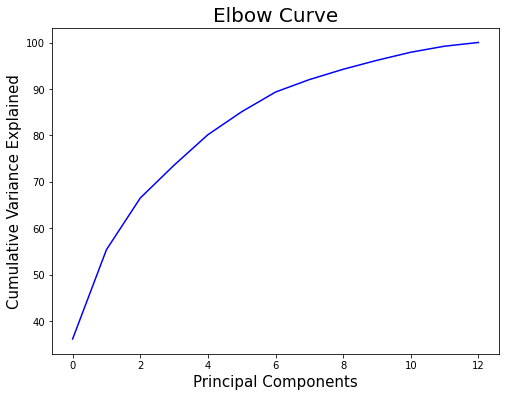

In [15]:
# elbow curve
fig = plt.figure(figsize = (8,6))

plt.title('Elbow Curve', fontsize = 20)
plt.xlabel('Principal Components',fontsize = 15)
plt.ylabel('Cumulative Variance Explained', fontsize = 15)

plt.plot(variance1, color = "blue")

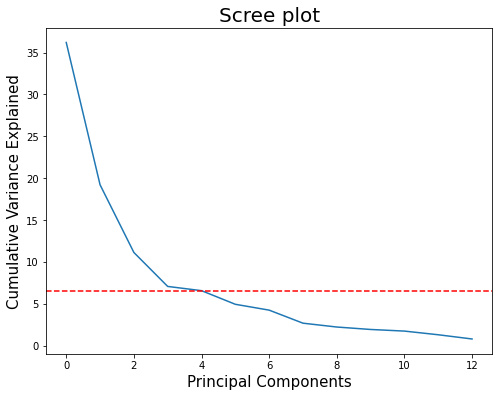

In [39]:
# scree plot
fig = plt.figure(figsize = (8,6))

plt.title('Scree plot', fontsize = 20)
plt.xlabel('Principal Components',fontsize = 15)
plt.ylabel('Cumulative Variance Explained', fontsize = 15)
plt.plot(pca.explained_variance_ratio_ * 100)
plt.axhline(y = 6.5, color = 'r', linestyle = '--')

plt.show()

- From above both the graphs, It shows the variances explained by each latent variable
- The first component explains approx. 40% of the variance in the whole dataset.
- Variance plot for PCA components obtained = 3

In [17]:
pca_values[: , 0:3]

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

## Visualization : PCA

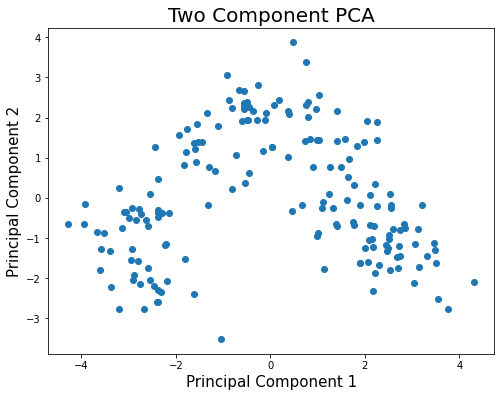

In [18]:
# plot between PCA1 and PCA2 
fig = plt.figure(figsize = (8,6))

ax = fig.add_subplot(1,1,1) 
ax.set_title('Two Component PCA', fontsize = 20)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

x = pca_values[:, 0:1]
y = pca_values[:, 1:2]

plt.scatter(x, y)
plt.show()

In [19]:
finalDf = pd.concat([pd.DataFrame(pca_values[:, 0:2], columns = ['pc1','pc2']), wine_data[['Type']]], axis=1)
finalDf.head()

,pc1,pc2,Type
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


In [20]:
finalDf.shape

(178, 3)

In [21]:
finalDf['Type'].unique()

array([1, 2, 3], dtype=int64)

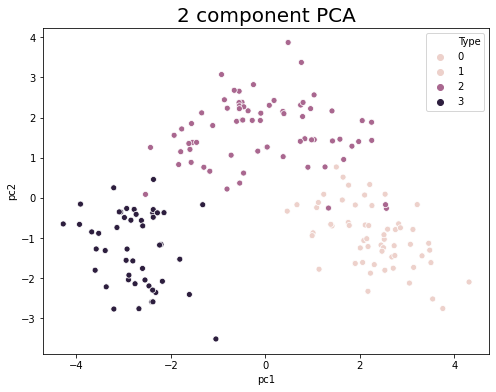

In [22]:
fig = plt.figure(figsize = (8,6))

ax = fig.add_subplot(1,1,1) 
ax.set_title('2 component PCA', fontsize = 20)

sns.scatterplot(data = finalDf, x = 'pc1', y = 'pc2', hue = 'Type')
plt.show()

## Clustering Part

In [23]:
from sklearn.cluster import KMeans

# calculation of inertia
wscc=[]
for i in range (1,11):
    # fit the K-Means algorith to our data
    kmeans=KMeans(n_clusters = i, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    
    # Computer the cluster sum of squares and append to WSCC list (with respect to Inertia)
    wscc.append(kmeans.inertia_)

## Elbow Curve

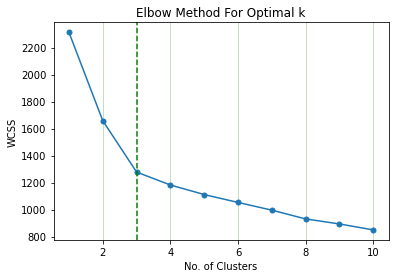

In [24]:
# Visualising elbow method
plt.plot(range(1,11), wscc, marker = 'o', markersize = 5)
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method For Optimal k")
plt.axvline(x = 3, color = 'g', linestyle = '--')
plt.grid(which = 'both', color = 'g', axis = 'x', alpha = 0.3)
plt.show()

- Elbow curve gives the number of clusters = 3
- Scree plot value is exactly same as the elbow curve value (3)
- Hence, we conclude that our number number of clusters = 3 with PCA value = 2

## A) Hirarchical Clustering

In [25]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [26]:
new_df = pd.DataFrame(pca_values[:,0:4])

# consider first 30 records for dendrogram
new_df1 = new_df.head(30)

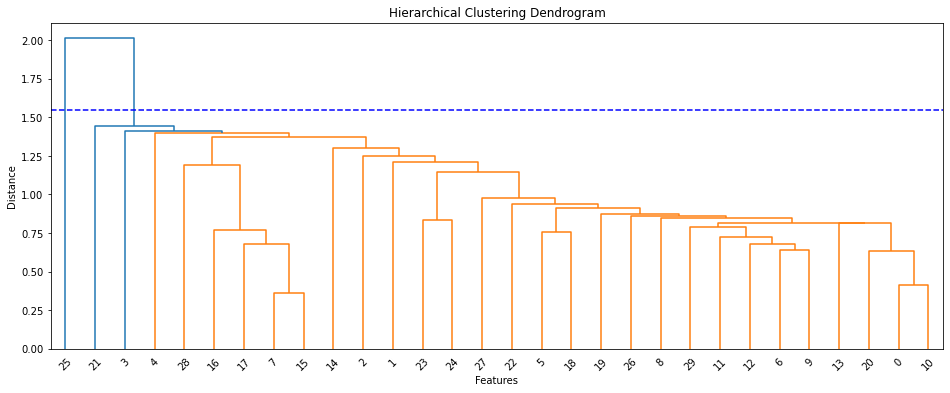

In [27]:
# create dendogram (Single method)
plt.figure(figsize=(16,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
dendogram = sch.dendrogram(sch.linkage(new_df1, method = 'single'))
plt.axhline(y = 1.55, color = 'b', linestyle = '--')
plt.show()

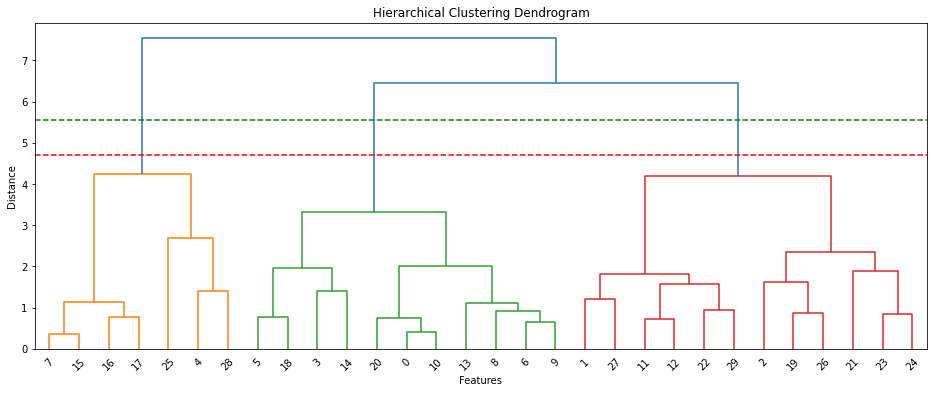

In [28]:
# create dendogram (ward method)
plt.figure(figsize=(16,6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
dendogram = sch.dendrogram(sch.linkage(new_df1, method = 'ward'))
plt.axhline(y = 4.7, color = 'r', linestyle = '--')
plt.axhline(y = 5.55, color = 'g', linestyle = '--')
plt.show()

## B) K-Means Clustering

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(new_df)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [30]:
# predicting the cluster values (labels)
y_kmeans = kmeans.fit_predict(new_df)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [31]:
from sklearn.metrics import silhouette_score

# Silhouette Score
print(f'Silhouette Score: {silhouette_score(new_df, y_kmeans)} .... (K=3)')

Silhouette Score: 0.406596910894866 .... (K=3)


In [32]:
# converting x into ndarray to avoid errors
X1 = np.array(new_df)
X1.astype

<function ndarray.astype>

In [33]:
# Centers of the cluster
print(kmeans.cluster_centers_)

[[ 2.25560713 -0.83354578 -0.0393534  -0.14704466]
 [-2.72003575 -1.12565126 -0.23909324  0.06245694]
 [-0.12730065  1.79981758  0.23793107  0.10278385]]


In [34]:
# this will tell us to which cluster down the data observations belongs to
new_label = kmeans.labels_
print(new_label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 0 2 2 2 0
 2 2 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [35]:
# New list called cluster
cluster = list(y_kmeans)
# Adding cluster to our data set
wine_data['clusters'] = cluster
wine_data.head(10)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,0
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,0


In [36]:
# mean of clusters 1 to 4
kmeans_mean_cluster = pd.DataFrame(round(wine_data.groupby('clusters').mean(), 1))
kmeans_mean_cluster

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
clusters,,,,,,,,,,,,,,
0,1.1,13.6,2.0,2.4,17.4,108.8,2.8,3.0,0.3,1.9,5.4,1.1,3.1,1082.2
1,2.9,13.1,3.3,2.4,21.2,98.7,1.7,0.8,0.5,1.1,7.2,0.7,1.7,619.1
2,2.0,12.2,1.9,2.2,20.2,91.2,2.2,2.0,0.4,1.6,2.9,1.1,2.8,500.5


In [37]:
kmeans.cluster_centers_

array([[ 2.25560713, -0.83354578, -0.0393534 , -0.14704466],
       [-2.72003575, -1.12565126, -0.23909324,  0.06245694],
       [-0.12730065,  1.79981758,  0.23793107,  0.10278385]])

## Visualization (K-Means)

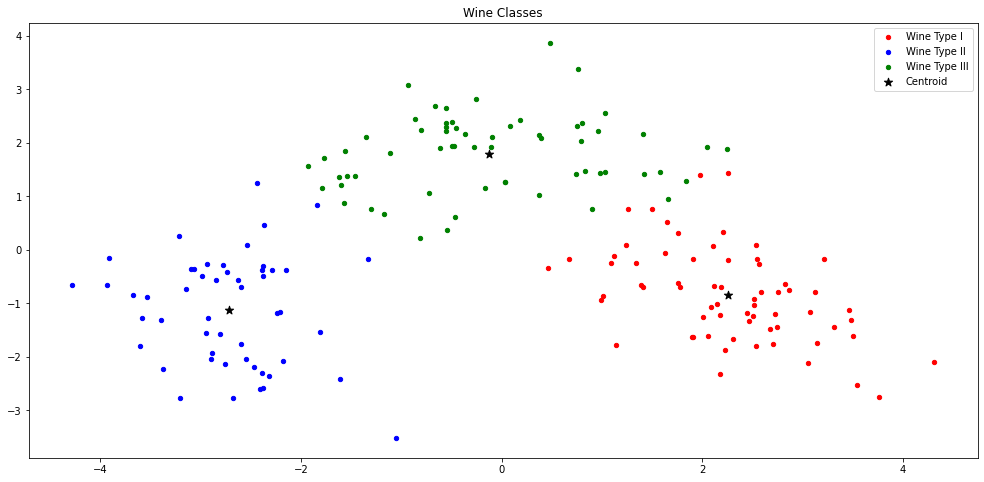

In [38]:
# scatter plot for cluster values 0, 1, 2, 3
fig = plt.figure(figsize=(17, 8))
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 75, c = 'red', marker='.', label = 'Wine Type I')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 75, c = 'blue', marker='.', label = 'Wine Type II')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 75, c = 'green', marker='.',label = 'Wine Type III')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 75, color='black', marker='*',label='Centroid')
plt.title('Wine Classes')
plt.legend()
plt.show()

- The visualization for scatter plot in K-Means clustering is exactly same with scatter plot in PCA
- We have reduced the features size from 14 (178, 14) to 3 (17,3) 
- The total number of PCA components = 2 
- The number of Clusters required = 3